In [7]:
import numpy as np   #for processing arrays
import pandas as pd  #for processing dataframes
import sqlite3 as sql  #SQL!
import matplotlib.pyplot as plt #picture making!
plt.style.use('fivethirtyeight') #A helpful style package


In [8]:
try:
    #Read in the needed csvs and create the DB
    winereview = pd.read_csv('winemag-data-130k-v2.csv')
    koreawine = pd.read_csv('cleansingWine.csv')

    conn = sql.connect('wine.db')
    winereview.to_sql('review', conn,  index = False)
    koreawine.to_sql('korea', conn,  index = False)

except:
    
    print("Issue during DB creation/connection")

Issue during DB creation/connection


In [9]:
sql_statement = """CREATE VIEW korea_counts AS 
                   SELECT nation, COUNT(*) AS num_wine_by_country_korea
                   FROM korea
                   GROUP BY nation
                   ORDER BY num_wine_by_country_korea DESC;
                   """
conn.execute(sql_statement)

NameError: name 'conn' is not defined

In [10]:

sql_statement = """CREATE VIEW us_counts AS
                   SELECT country, COUNT(*) AS num_wine_by_country_us
                   FROM review
                   GROUP BY country
                   ORDER BY num_wine_by_country_us DESC"""       
                   
conn.execute(sql_statement)

NameError: name 'conn' is not defined

---
#### CS 260 Final Project - Fall 2022
---

# Wine Data in Korea vs. Wine Data in the U.S

### By: Luke Faro & Johann Krug


---

## 1. Introduction

For this project, our group explored different facets of wine enjoyed by people living over in Korea

We concentrated on asking these questions.
1. What countries does Korea get most of its wine shipped from compared to the United States? (join)
1. Are certain strong flavors of wine more popular than others? (Bar chart) 
1. How many of these strong, full bodied wines make up imports from France, the most common producer of wine in the korean table? (Histogram)
1. What degree of sweetness do people prefer their wine?(Bar Graph)
1. Is there a correlation between the Price of the wine and and how long it's been aged for? (scatter plot)
1. What has been the trend in wine over the past four decades?(Line graph)


---

## 2. Data

A direct link to the data can be found at the following website. 
 * https://www.kaggle.com/datasets/dev7halo/wine-information
 
 According the website, the data being provided was collected by a korean programmer who needed a large quanity of data to program a recommendation algorithm. He decided to collect the data in the table from a Wine Tasting website in Korea.

 * https://www.kaggle.com/datasets/mysarahmadbhat/wine-tasting

 The data in this table is a collection of reviews for wines consumed by reviewers in the US.

In [ ]:
#load csv data into a db here
sql_statement = """SELECT *
                   FROM korea"""

koreawine = pd.read_sql_query(sql_statement, conn)
koreawine

,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,0,137197,Altair,Altair,Chile,Rapel Valley,None,None,None,Cabernet Sauvignon,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,None,None,None,Cabernet Sauvignon,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,2,137199,Baron du Val Red,Baron du Val,France,None,None,None,None,Carignan,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,3,137200,Baron du Val White,Baron du Val,France,None,None,None,None,Carignan,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,None,None,None,Cabernet Sauvignon,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,21600,168703,"Besserat de Bellefon, Bleu Brut",Besserat de Bellefon,France,Champagne,None,None,None,Pinot Meunier,...,"Appetizer, Table",None,None,SWEET1,ACIDITY5,BODY2,TANNIN1,128000,0,750
21601,21601,168704,"Leopard’s Leap, Cuvee Brut",Leopards Leap,the Republic of South Africa,Coastal Region,Paarl,None,None,Chardonnay,...,"Appetizer, Table",12~13,6~8,SWEET1,ACIDITY5,BODY2,TANNIN1,40000,0,750
21602,21602,168705,"Leopard’s Leap, Chardonnay Pinot Noir",Leopards Leap,the Republic of South Africa,Western Cape,None,None,None,Chardonnay,...,"Appetizer, Table",12~13,10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,40000,2020,750
21603,21603,168706,"Leopard’s Leap, Chardonnay",Leopards Leap,the Republic of South Africa,Coastal Region,Paarl,Wellington,None,Chardonnay,...,"Appetizer, Table",12~13,10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,40000,2020,750


In [ ]:
sql_statement = """SELECT *
                   FROM review"""

winereview = pd.read_sql_query(sql_statement, conn)
winereview

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,None,None,Anna Lee C. Iijima,None,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,None,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,None,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",None,90,32.0,Alsace,Alsace,None,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
sql_statement = """SELECT * 
                   FROM korea_counts AS k
                   JOIN us_counts AS u
                    ON k.nation = u.country
                   """
  
test = pd.read_sql_query(sql_statement, conn)
test

,nation,num_wine_by_country_korea,country,num_wine_by_country_us
0,France,6949,France,22093
1,Italy,4331,Italy,19540
2,Chile,2031,Chile,4472
3,Spain,1684,Spain,6645
4,Australia,1490,Australia,2329
5,Argentina,544,Argentina,3800
6,Germany,415,Germany,2165
7,New Zealand,305,New Zealand,1419
8,Portugal,251,Portugal,5691
9,Austria,132,Austria,3345


### 2.1 Variables Explained

The variables in the **korea** table are explained below.

* **Unnamed:** Effectively the table's ID column for each entry
* **ID:** The identifier code for each wine reviewed in the table
* **Name:** The name of the bottle of wine
* **Producer:** The name of the producer of the wine
* **Nation:** The wine's country of origin
* **Local 1 - 4:** Additional information on the wine's place of origin
* **Varieties 1 - 12:** Classifications that the specific bottle of wine falls under
* **Wine_type:** The wine's color classification
* **Wine_use:** The situation in which the wine is intended to be consumed
* **Alcohol by volume:** The wine's alcohol by volume in ml, as the table is in line with korean standards
* **Degree:** The recommended temperature to serve the wine, in Celsius
* **Sweet:** The wine's level of sweetness, on a scale of 1 - 5.
* **Acidity:** The wine's level of acidity, on a scale of 1 - 5.
* **Body:** The strength of the wine's body, on a scale of 1 - 5. This refers to heaviness and richness of the wine.
* **Tannin:** The wine's level of tannin flavor, on a scale of 1 - 5. This refers to a bitterness, often atributed to grape skins.
* **Price:** The wine's price in Korean Won
* **Year:** How long the wine's been aged for, up till 2020 when the table was published.
* **Ml:** The total amount of liquid in the bottle 

The variables in the **review** table are explained below.  
* **ID:** The ID number for each entry in the table
* **Country:** The wine's country of origin. This is what we focused on for our join, as we wanted to see what similarities and differences people who live in the US and Korea had when it came to getting their wines.
* **Description:** A description of the wine given by the reviewer.
* **Designation:** The specific classification for the specific bottle of wine.
* **Points:** The amount of points the reviewer awarded the wine, on a scale of 0 - 100.
* **Price:** The price of the bottle, in USD.
* **Province:** A general location of origin for the wine.
* **Region 1 & 2:** Additional geographic data for the wine's place of origin.
* **Taster_name:** The reviewer's name
* **Taster_twitter_handle:** The reviwer's twitter handle.
* **title:** The name of the wine being reviewed.
* **Variety:** The general/color classification for a specific bottle of wine.
* **Winery:** The name of the winery that produced the wine.

The **view** table above was our solution to joining the two tables together for graphical purposes. It counts the number of times a country shows up in both tables

---

## 3. Analysis


### Q1:  We wanted to know where people from the US and Korea primarily ordered their wines from. As such, we used a join to create this Bar graph, which counts how often a given country appears in the joint table.

In [ ]:
test#['num_wine_by_country_korea']/len(koreawine)*100)
len(koreawine)

10849

<BarContainer object of 23 artists>

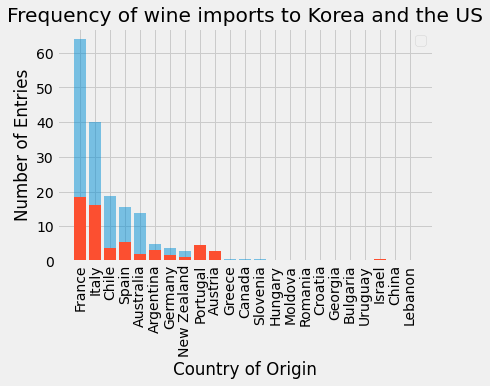

In [ ]:
# Code for a visualization
plt.bar(test['nation'], (test['num_wine_by_country_korea']/len(koreawine)*100), Alpha = 0.5)
plt.legend()
plt.ylabel('Number of Entries')
plt.xlabel('Country of Origin')
plt.title('Frequency of wine imports to Korea and the US')
plt.xticks(rotation = 90)

plt.bar(test['country'], (test['num_wine_by_country_us']/len(winereview)*100))

Looking at this bar graph it shows us that French wines shows up more in both the Korea and US tables. It will be interesting to compare the price distributions from Korea and the US.

From the data we can see that most wines imported to both countries come from France.



The above picture made us wonder what exactly made wine popular in korea, so we counted the entries in the korean wine table and sorted them by flavour, seeing which strong flavor was most commonly consumed.

### Q2:  Which strong flavor is the most commonly consumed in Korea?

In [ ]:
sql_statement = """ SELECT 'SWEET5' AS flavor, COUNT(sweet) AS count
                            FROM korea
                            WHERE sweet LIKE 'SWEET5'
                            UNION 
                           SELECT 'ACIDITY5', COUNT(acidity)
                            FROM korea
                            WHERE acidity LIKE 'ACIDITY5' 
                            UNION
                           SELECT 'BODY5', COUNT(body)
                            FROM korea
                            WHERE body LIKE 'BODY5'
                            UNION 
                           SELECT 'TANNIN5', COUNT(tannin)
                            FROM korea
                            WHERE tannin LIKE 'TANNIN5'"""

koreawine = pd.read_sql_query(sql_statement, conn)
koreawine


,flavor,count
0,ACIDITY5,1584
1,BODY5,2200
2,SWEET5,474
3,TANNIN5,774


<BarContainer object of 4 artists>

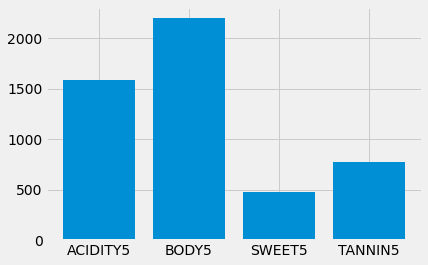

In [ ]:
plt.bar(koreawine['flavor'],koreawine['count'])

This bar graph shows that BODY5 is the most commonly consumed at its highest level while SWEET5 is the least common. Our next question was to ask what level of sweetness do Koreans enjoy their wine at, seeing as how maximum sweetness wines were uncommon.

### Q3: What's the preferred level of sweetness for wines in Korea?

In [ ]:
# Code for a visualization
sql_statement = """SELECT  sweet, COUNT(sweet) AS sweetness_count
                   FROM korea
                   WHERE sweet IS NOT NULL
                   GROUP BY sweet"""

koreawine = pd.read_sql_query(sql_statement, conn)
koreawine

,sweet,sweetness_count
0,SWEET1,18995
1,SWEET2,1044
2,SWEET3,386
3,SWEET4,704
4,SWEET5,474


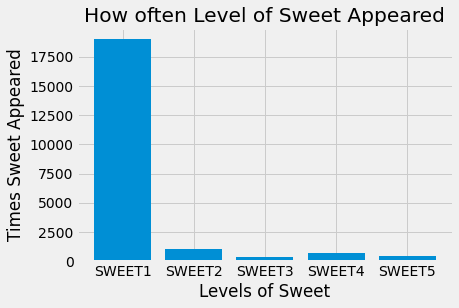

In [ ]:
plt.bar(koreawine['sweet'],koreawine['sweetness_count'])
plt.xlabel('Levels of Sweet')
plt.ylabel('Times Sweet Appeared')
plt.title('How often Level of Sweet Appeared');

Conversely to Body, wines with relatively low Sweetness are common in Korea. Now we know that generally speaking; Koreans enjoy rich, full bodied wines with a low sweetness level. 

We then wondered what another factor in the popularity of wines might be, and decided to look into their prices.

### Q4: How do the prices of Korean Wines compare to those of American Wines? Are certain prices of wine more common?



The data tables below have been truncated to remove prices of wines greater than 200. There were huge outliers that would cause the graph to be incomprehensible when included, and the resulting data still accounts for almost all of the tables, those outliers aside.


In [ ]:
sql_statement = """ SELECT price * .00076 AS price_converted
                    FROM korea
                    WHERE price_converted > 0.0 AND price_converted < 200
                    ORDER BY price_converted DESC"""

koreawine = pd.read_sql_query(sql_statement, conn)
koreawine

,price_converted
0,199.120
1,199.120
2,197.600
3,197.600
4,197.600
...,...
10844,3.724
10845,3.420
10846,3.344
10847,2.964


In [ ]:
sql_statement = """ SELECT price
                    FROM review
                    WHERE price > 0.0 AND price < 200.0
                    ORDER BY price DESC"""

winereview = pd.read_sql_query(sql_statement, conn)
winereview

,price
0,199.0
1,199.0
2,199.0
3,199.0
4,199.0
...,...
120194,4.0
120195,4.0
120196,4.0
120197,4.0


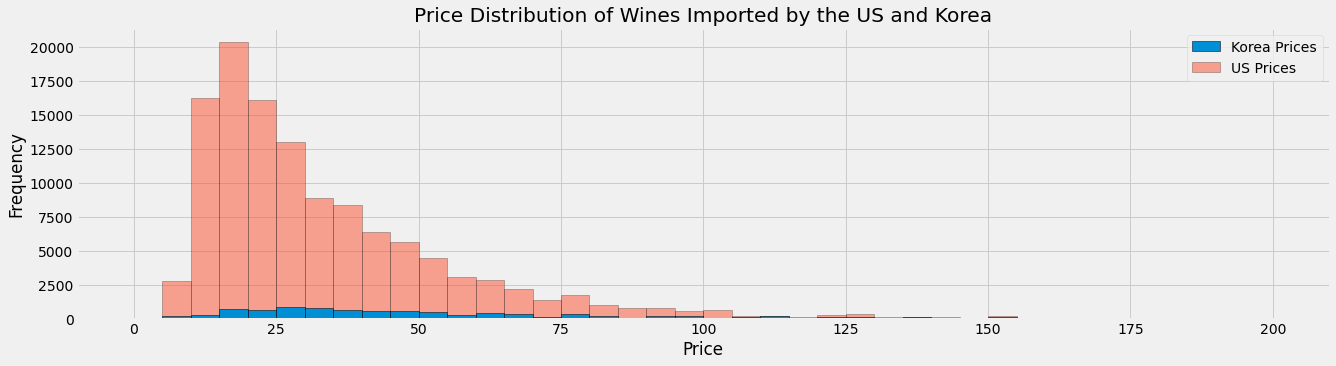

In [ ]:
# Code for a visualization
#Plot the histogram for the Korean Wine prices
plt.figure(figsize = (20,5))
n = len(koreawine)
multipliers_koreawine = np.ones(n)*100/n 

bin_koreawine = plt.hist(koreawine['price_converted'], zorder = 2, 
                             edgecolor = 'black', 
                             bins = np.arange(0,201,5), 
                             #weights = koreawine, 
                             label = "Korea Prices")

#Plot the histogram for the US Wine prices
n = len(winereview)
multipliers_winereview = np.ones(n)*100/n 

bin_winereview = plt.hist(winereview['price'], 
                             edgecolor = 'black', 
                             bins = np.arange(0,201,5), 
                             #weights = winereview,
                             label = "US Prices",
                             alpha = 0.5)

#Create a legend
plt.legend()

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution of Wines Imported by the US and Korea');

Here we see that a substantial amount of wines ordered in both the US and Korea tend to fall into the 20 - 35$ usd range (the prices of the korean wines have been converted to USD for graphical purposes)

Seeing as how most wines tended to fall within a fairly reasonable price range, we then asked ourselves if the price of the wine had any effects on its other qualities. Seeing as how Aging tends to be an important quality of the drink, we decided to check if there was a correlation between years aged and the price of the wine.

### Q5:  Is there any sort of correlation between the number of years a wine had been aged for, and its price?

In [ ]:
# Code for a visualization
sql_statement = """SELECT price, (2020 - year) AS years_aged
                   FROM korea
                   WHERE (price != 0) AND (year != 0)
                   ORDER BY years_aged"""

koreawine = pd.read_sql_query(sql_statement, conn)
koreawine

,price,years_aged
0,30000,0
1,42000,0
2,43000,0
3,36000,0
4,46000,0
...,...,...
11064,120000,41
11065,1052000,42
11066,1107000,42
11067,464000,44


Text(0, 0.5, 'Price (In USD)')

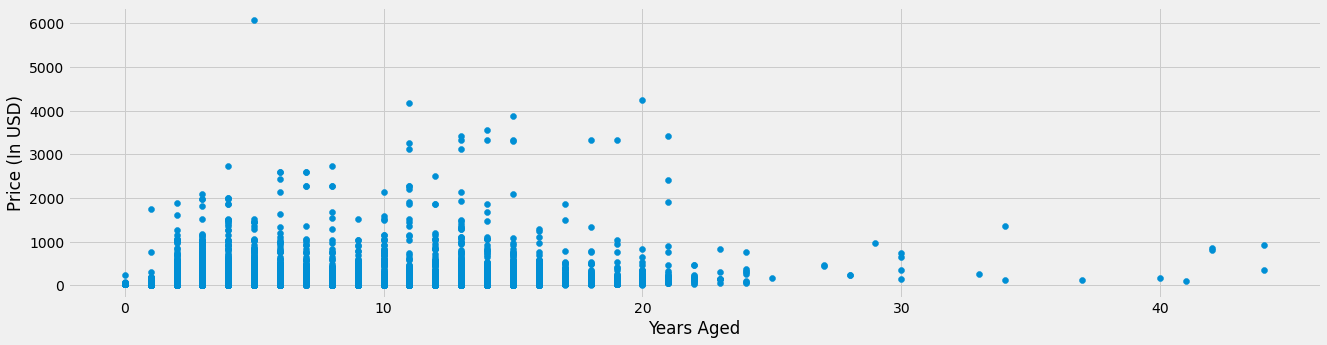

In [ ]:
# Add more code here if necessary - example - maybe there is a related picture or maybe you found a correlation coefficient....
plt.figure(figsize = (20,5))
plt.scatter(koreawine['years_aged'], koreawine['price'] * 0.00076)
plt.xlabel('Years Aged')
plt.ylabel('Price (In USD)')


In the scatter plot we see that a large majority of the wine is aged 20 years or less, and seems to be mostly below 1,000 USD. Knowing that most wines fall under the 20 years aged category, we wanted to see how many French wines fell under this category, seeing as how they were the most commonly imported.

### Q6: How many wines from France were ordered from each year over the past 4 decades?

In [ ]:
# Code for a visualization
sql_statement = """SELECT  COUNT(nation), year
                   FROM korea
                   WHERE nation = 'France'
                   AND year != 0
                   GROUP BY year
                   ORDER BY year ASC"""

korea_france= pd.read_sql_query(sql_statement, conn)
korea_france

,COUNT(nation),year
0,4,1976
1,2,1978
2,1,1979
3,1,1981
4,1,1983
5,2,1986
6,1,1988
7,1,1989
8,3,1990
9,1,1991


From this data we can find the count of French wines over the last 40 plus years.

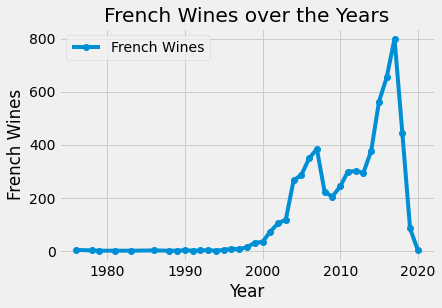

In [ ]:
# Add more code here if necessary - example - maybe there is a related picture or maybe you found a correlation coefficient....
plt.plot(korea_france['year'],korea_france['COUNT(nation)'],marker='o',label='French Wines')
plt.title('French Wines over the Years')
plt.xlabel('Year')
plt.ylabel('French Wines')
plt.legend();

This visualization shows which year was most popular with French wine. It also shows that French wines from before the year 2000 were uncommon. After 2000, French wines started to get ordered more commonly before peaking in 2017.

---

## Conclusion

In summary, we've learned a few things about Koreans and their wine preferences. First and foremost, the most common place that wines are imported from is France. Most of these wines seem to have been ordered between 2000 and 2020, meaning that they typically aren't aged for too many years. Secondly, they aren't particularly fond of sweet wines, and prefer heavier wines with a rich, full body. It's possible that the reason that French wines are so popular is because they strike a good balance between price, body, and age that's equally popular and accessible in Korea. During the course of our research into the data tables, we've also discovered that the US and Korea tend to have similar wine buying tendencies (France is a popular choice). 